In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
med_df=pd.read_csv('https://raw.githubusercontent.com/dassourav134/NLP/main/medicine_data.csv', header=0)

In [ ]:
med_df.shape

(22481, 4)

In [ ]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   22481 non-null  int64 
 1   Drug_Name    22481 non-null  object
 2   Reason       22481 non-null  object
 3   Description  22467 non-null  object
dtypes: int64(1), object(3)
memory usage: 702.7+ KB


In [ ]:
med_df.head(20)

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,acne,mild moderate acne spot
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,acne,ret prescription medicine used reduce fine wri...
2,ACGEL CL NANO Gel 15gm,acne,used treat acne vulgaris people year age older...
3,ACGEL NANO Gel 15gm,acne,used treat acne vulgaris people year age older...
4,Acleen 1% Lotion 25ml,acne,treat severe form acne nodular acne
5,Aclene 0.10% Gel 15gm,acne,treat severe form acne nodular acne
6,Acnay Gel 10gm,acne,treat severe form acne nodular acne
7,Acne Aid Bar 50gmAcne Aid Bar 100gm,acne,treat acne vulgaris
8,Acne UV Gel 60gm,acne,treat acne vulgaris
9,Acne UV SPF 30 Gel 30gm,acne,treat mild moderate acne spot


In [ ]:
med_df = med_df.drop('Unnamed: 0', axis=1)


In [ ]:
med_df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
med_df.isnull().sum()

Drug_Name       0
Reason          0
Description    14
dtype: int64

In [ ]:
med_df.isnull().sum()/len(med_df)

Drug_Name      0.000000
Reason         0.000000
Description    0.000623
dtype: float64

In [ ]:
med_df = med_df.dropna(subset=['Description'])

In [ ]:
med_df.shape

(22467, 3)

In [ ]:
med_df.describe()

,Drug_Name,Reason,Description
count,22467,22467,22467
unique,22465,51,300
top,Gefer Capsule 10'S,Supplement,"treat type 2 diabetes mellitus when diet, phys..."
freq,2,3913,671


In [ ]:
med_df.duplicated().sum()

0

In [ ]:
reason_value_counts = med_df['Reason'].value_counts()
print(reason_value_counts)


Supplement           3913
Pain                 2852
Infection            2629
Hypertension         2505
Diabetes             2013
Fungal                878
Allergies             851
Depression            628
Anxiety               502
Anaemia               490
Acne                  394
Angina                327
Psychosis             301
Constipation          289
Viral                 287
Diarrhoea             263
General               243
Malarial              228
Schizophrenia         217
Glaucoma              197
Arthritis             178
Vaccines              167
Fever                 157
Pyrexia               141
Hypnosis              129
Alzheimer             123
Osteoporosis          123
Hyperpigmentation     122
Vertigo               119
Digestion             117
Migraine              113
Parkinson             108
Gout                  107
Contraception          96
Haematopoiesis         79
Haemorrhoid            75
Wound                  72
Appetite               67
Dandruff    

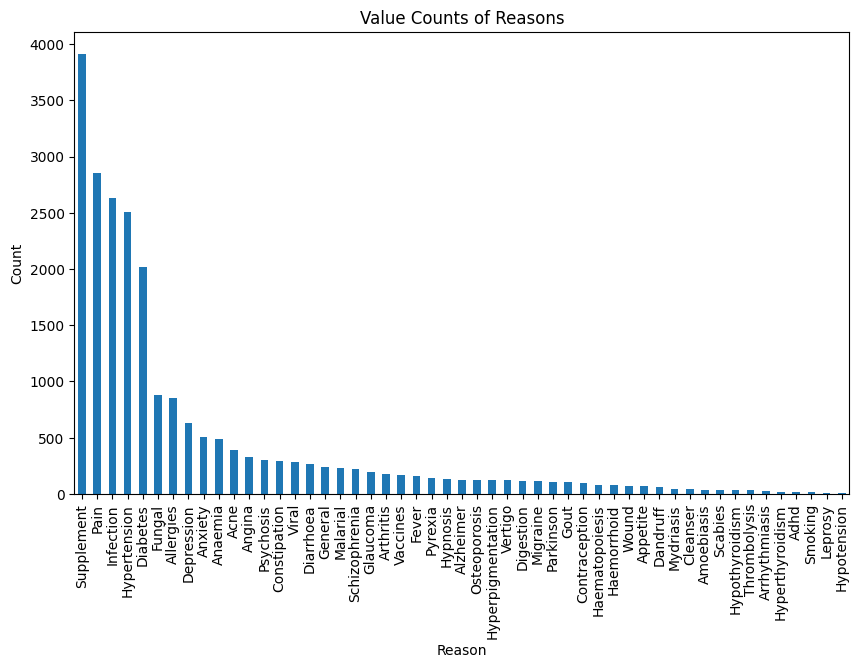

In [ ]:
reason_value_counts = med_df['Reason'].value_counts()
plt.figure(figsize=(10, 6))
reason_value_counts.plot(kind='bar')
plt.title('Value Counts of Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
  # Using regex to remove non-alphanumeric characters and convert to lowercase
  text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
  # Tokenize the text
  tokens = text.split()
  # Removing stop words and lemmatize
  tokens = [lemmatizer.lemmatize(tokens) for tokens in tokens if tokens not in stop_words]
  return  ' '.join(tokens)

# Applying the preprocessing function to the 'Description' column
med_df['Description'] = med_df['Description'].apply(preprocess_text)
# Converting the 'Reason' column to lowercase
med_df['Reason'] = med_df['Reason'].str.lower()

In [ ]:
med_df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,acne,mild moderate acne spot
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,acne,ret prescription medicine used reduce fine wri...
2,ACGEL CL NANO Gel 15gm,acne,used treat acne vulgaris people year age older...
3,ACGEL NANO Gel 15gm,acne,used treat acne vulgaris people year age older...
4,Acleen 1% Lotion 25ml,acne,treat severe form acne nodular acne


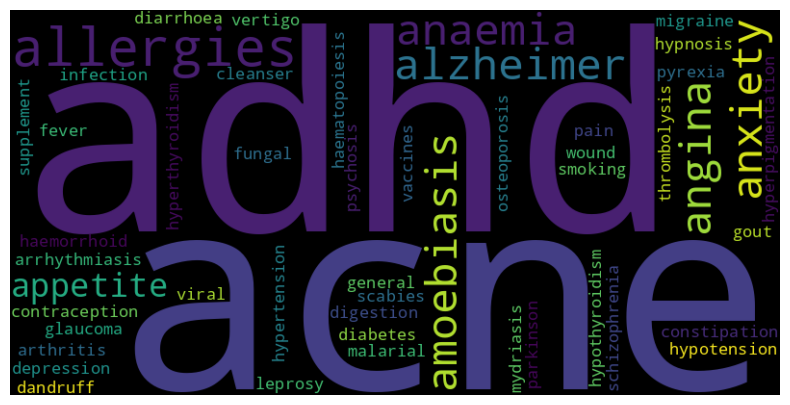

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud of the most common drug names
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(med_df['Reason'].unique()))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


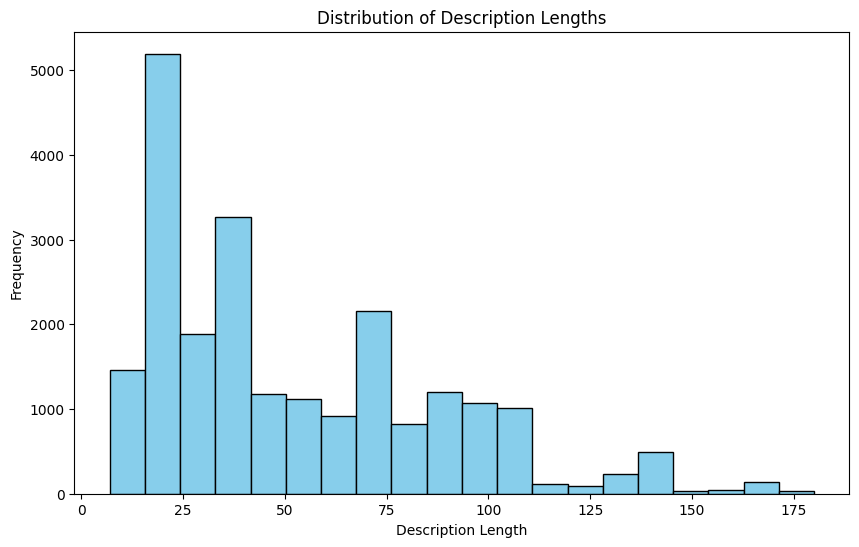

In [ ]:
# Calculate the length of each description
description_lengths = med_df['Description'].apply(len)

# Create a histogram of description lengths
plt.figure(figsize=(10, 6))
plt.hist(description_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the TF-IDF vectorizer for the Reason and Description separately
tfidf_vectorizer_reason = TfidfVectorizer()
tfidf_vectorizer_description = TfidfVectorizer()

# Fit and transform the 'Reason' and 'Description' columns to obtain the TF-IDF vectors separately
tfidf_matrix_reason = tfidf_vectorizer_reason.fit_transform(med_df['Reason'])
tfidf_matrix_description = tfidf_vectorizer_description.fit_transform(med_df['Description'])



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize TF-IDF vectorizer with adjustments
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,  # Apply sublinear TF scaling
    smooth_idf=True     # Apply IDF smoothing
)

# Fit and transform the combined 'Reason' and 'Description' data
tfidf_matrix = tfidf_vectorizer.fit_transform(med_df['Reason'] + " " + med_df['Description'])

# Calculate the cosine similarity between the TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Example: Get the cosine similarity between the first and second documents
similarity_score = cosine_sim[0][3]
print("Cosine Similarity between the first and second documents:", similarity_score)


Cosine Similarity between the first and second documents: 0.22221622993031614


In [ ]:
def recommend_drug(user_reason, user_description):
    # Preprocess and transform user input
    user_input_tfidf = tfidf_vectorizer.transform([user_reason + " " + user_description])

    # Calculate cosine similarity between user input and existing reasons + descriptions
    similarity_scores = cosine_similarity(user_input_tfidf, tfidf_matrix).flatten()

    # Find the index of the most similar reason + description
    most_similar_index = similarity_scores.argmax()

    # Get the recommended drug name
    recommended_drug = med_df.loc[most_similar_index, 'Drug_Name']

    return recommended_drug

# Get user input for reason and description
user_reason = input("Enter a reason: ")
user_description = input("Enter a description: ")

# Get the recommended drug and print it
recommended_drug = recommend_drug(user_reason, user_description)
print(f"Recommended Drug: {recommended_drug} ")

Enter a reason: hypertension
Enter a description: sweating
Recommended Drug: Urix 10mg Injection 2ml 
